# Supplementary Practice Problems

These are similar to programming problems you may encounter in the mid-terms. They are not graded but we will review them in lab sessions.

**1**. (10 points) The logistic map is defined by the following simple function

$$
f(x) = rx(1-x)
$$

For $x_0 = 0.1$ and $r = 4.0$, store the first 10 values of the iterated logistic map $x_{i+1} = rx_i(1-x_i)$ in a list. The first value in the list should be $x_0$.

In [3]:
res = []
x = 0.1
r = 4.0
for i in range(10):
    res.append(x)
    x = r*x*(1-x)
print(res)

[0.1, 0.36000000000000004, 0.9216, 0.28901376000000006, 0.8219392261226498, 0.5854205387341974, 0.970813326249438, 0.11333924730376121, 0.4019738492975123, 0.9615634951138128]


**2**. (10 points) Write a function to find the greatest common divisor (GCD) of 2 numbers using Euclid's algorithm.:

\begin{align}
\gcd(a,0) &= a \\
\gcd(a, b) &= \gcd(b, a \mod b)
\end{align}

Find the GCD of 5797 and 190978. 

Now write a function to find the GCD given a collection of numbers.

Find the GCD of (24, 48, 60, 120, 8).

In [5]:
def gcd(a,b):
    if b==0: return a
    else: return gcd(b,a%b)
gcd(5797,190978)

17

In [11]:
input = [24, 48, 60, 120, 8]
def gcd_collection(input):
    prev = gcd(input[0],input[1])
    for i in range(2,len(input)):
        curr = gcd(prev,input[i])
        prev = curr
    return curr
gcd_collection(input)

4

**3**. (10 points) Find the least squares linear solution to the following data

```
y = [1,2,3,4]
x1 = [1,2,3,4]
x2 = [2,3,4,5]
```

That is, find the "best" intercept and slope for the variables `x1` and `x2`.

In [9]:
import numpy as np
import scipy.linalg as la
y = np.array([1,2,3,4])
x1 = np.array([1,2,3,4]).reshape(4,1)
x2 = np.array([2,3,4,5]).reshape(4,1)
x0 = np.ones(4).reshape(4,1)
X = np.c_[x0,x1,x2]
la.lstsq(X,y)

(array([-0.33333333,  0.66666667,  0.33333333]),
 array([], dtype=float64),
 2,
 array([9.34413269, 0.82896583, 0.        ]))

**4**. (10 points) Read the `mtcars` data frame from R to a `pandas` DataFrame. Find the mean `wt` and `mpg` for all cars grouped by the number of `gear`s.

In [33]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
r.data('mtcars')
mtcars = r['mtcars']
mtcars.groupby('gear').mean()[['wt','mpg']]

,wt,mpg
gear,,
3.0,3.892600,16.106667
4.0,2.616667,24.533333
5.0,2.632600,21.380000


**5**. (10 points) Read the `iris` data frame from R to a `pandas` DataFrame. Make a `seaborn` plot showing a linear regression of `Petal.Length` (y) against `Sepal.Length` (x). Make a separate regression line for each `Species`.

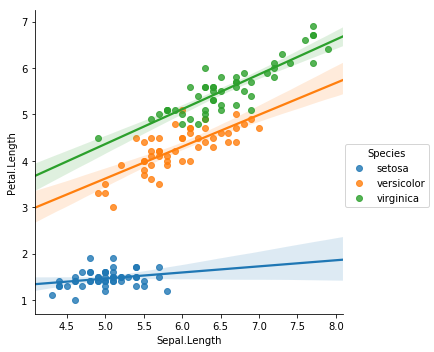

In [36]:
import seaborn as sns
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()
r.data('iris')
iris = r['iris']
g = sns.lmplot(x="Sepal.Length", y="Petal.Length", hue = 'Species', data = iris)

**6**. (10 points) Write a function that can flatten a nested list of arbitrary depth. Check that

```python
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])
```

returns

```python
[1,2,3,4,5,6,7,8,9,10,11,12]
```

For simplicity, assume that the only data structure you will encounter is a list. You can check if an item is a list by using 

```python
isinstance(item, list)
```

In [39]:
def flatten(l):
    if not isinstance(l,list):
        print('Not a list')
        return None
    else:
        
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])

[1, [2, 3], [4, [5, [6, 7], 8], 9], 10, [11, 12]]

In [11]:
def flatten(l):
    res = []
    for element in l:
        if isinstance(element, list):
            for item in flatten(element):
                res.append(item)
        else:
            res.append(element)
    return res
flatten([1,[2,3],[4,[5,[6,7],8],9],10,[11,12]])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

**7**. (10 points) Create the following table

```python
array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])
```

Start with the first row

```
[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]
```

and build the subsequent rows using a simple rule that only depends on the previous row.

In [55]:
matrix = np.fromfunction(lambda i,j: np.where((i==j) | (j==0), 1, 0), (11,11), dtype='int')
for i in range(2,11):
    for j in range(1,11):
        matrix[i,j] = matrix[i-1,j]+matrix[i-1,j-1]
matrix

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1,   0],
       [  1,  10,  45, 120, 210, 252, 210, 120,  45,  10,   1]])

**8**. (10 points) Read the following data sets into DataFrames. 

- url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
- url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"

Create a new DataFraem only containing the names present in both DataFrames. Drop the `timef` column and have a single column for `dist` , `climb` and `time` that shows the average value of the two DataFrames. The final DtataFrame will thus have 4 columns (name, dist, climb, time).

In [13]:
import pandas as pd
url1 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills.csv"
url2 = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/DAAG/hills2000.csv"
data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)
data = pd.merge(data1,data2,on='Unnamed: 0')
data.drop('timef',axis=1)

,Unnamed: 0,dist_x,climb_x,time_x,dist_y,climb_y,time_y
0,Craig Dunain,6.0,900,33.650,6.0,900,0.546111
1,Ben Lomond,8.0,3070,62.267,9.0,3192,1.037778
2,Goatfell,8.0,2866,73.217,8.0,2866,1.227778
3,Scolty,5.0,800,29.750,5.0,800,0.495833
4,Traprain,6.0,650,39.750,6.5,650,0.623889
5,Dollar,5.0,2000,43.050,6.0,2000,0.638333
6,Lomonds,9.5,2200,65.000,9.0,2200,1.053056
7,Black Hill,4.5,1000,17.417,4.0,600,0.447778
8,Meall Ant-Suidhe,3.5,1500,27.900,3.5,1500,0.465000
9,Creag Dubh,4.0,2000,26.217,3.0,1223,0.463889
